# Flor de vida

* Escriba un codigo que dibuje [La Flor de la
Vida](https://es.wikipedia.org/wiki/Flor_de_la_Vida).  
* El archivo `monthrg.dat` tiene 5 columnas. 
   La primera columna corresponde a un año, la segunda a un mes
   y la cuarta al numero promedio de manchas solares ese mes.
   Escriba un programa que lea el archivo y luego grafique el numero de manchas solares
   en función del tiempo medido en años.
   La gráfica debe empezar en el mes de su nacimiento y debe ir hasta
   el último dato disponible en el archivo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

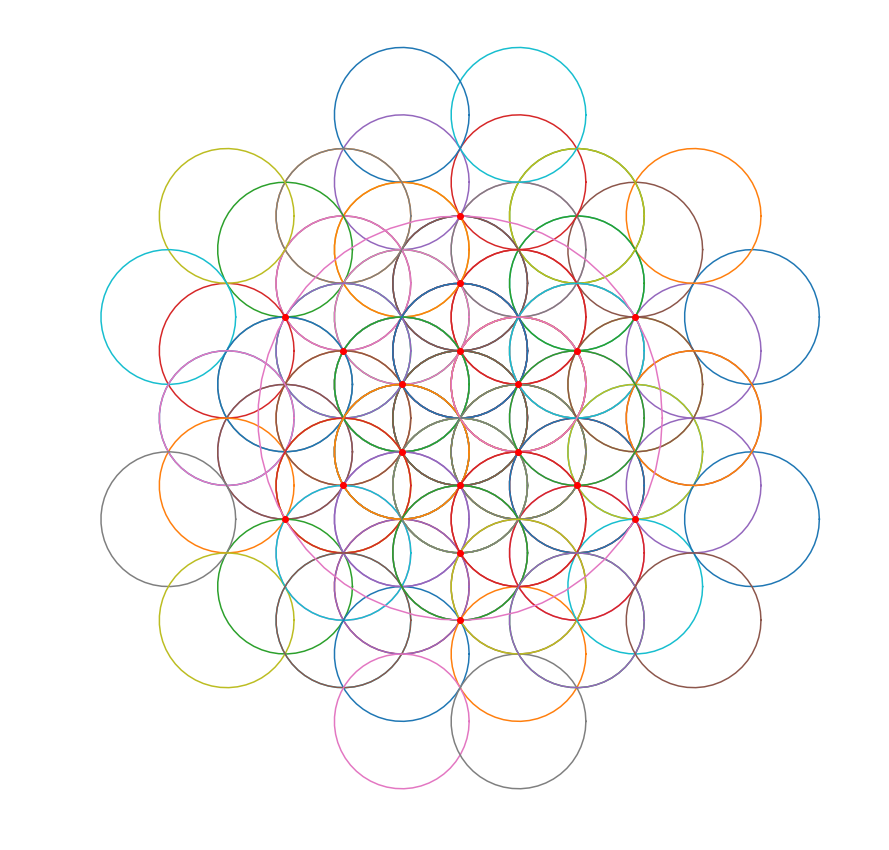

In [14]:
fig = plt.figure(figsize=(15,15))
plt.axis("equal")
plt.axis("off")

angle = np.pi / 3
radius = 40
partial_rad = radius / 3

angles = np.arange(0, 2*np.pi, angle)

circle_angles = np.linspace(0, 2*np.pi)
c, s = np.cos(np.pi/6), np.sin(np.pi/6)
R = np.array([[c, -s], [s, c]])

for ang in angles:
    for r in range(0, 3):
        dx, dy = r*radius * np.cos(ang), r*radius * np.sin(ang)
        x = radius * np.cos(circle_angles) + dx
        y = radius * np.sin(circle_angles) + dy
        coor = np.dot(R, np.vstack((x, y)))
        #plt.plot(x, y)
        plt.plot(coor[0, :], coor[1, :], zorder=1)


#i = 0
rect_angles = np.arange(0, 2*np.pi, np.pi/6)
#r = np.sqrt(3)
"""
for ang in rect_angles:
    if i % 2 == 0: 
        dx, dy = r*radius * np.cos(ang), r*radius * np.sin(ang)
        x = radius * np.cos(circle_angles) + dx
        y = radius * np.sin(circle_angles) + dy
        plt.plot(x, y)
    i += 1
"""

#r1 = 2*radius
#ang = np.pi/6
r = np.sqrt(3)

for cent_ang in angles:
    for k in range(1, 4):
        offx, offy = k*radius*np.cos(cent_ang), k*radius*np.sin(cent_ang)
        off = np.dot(R, np.array([[offx], [offy]]))
        plt.plot(off[0, :], off[1, :], 'ro')
        i = 0
        for ang in rect_angles:
            if i % 2 == 0:
                dx, dy = r*radius * np.cos(ang), r*radius * np.sin(ang)
                x = radius * np.cos(circle_angles) + dx + off[0, :]
                y = radius * np.sin(circle_angles) + dy + off[1, :]
                plt.plot(x, y, zorder=1)
            i += 1

    #i = 0
    #for ang in rect_angles:
        #if i % 2 == 0:
    #dist = np.sqrt(offx**2 + offy**2)
    #dx, dy = r2*radius * np.cos(ang), r2*radius * np.sin(ang)
    #x = radius * np.cos(circle_angles) + offx 
    #y = radius * np.sin(circle_angles) + offy
    #plt.plot(x, y)
        #i += 1


full_radius = radius * 3
x = full_radius * np.cos(circle_angles)
y = full_radius * np.sin(circle_angles)
plt.plot(x, y, zorder=1)

n, radii = 50, [full_radius, 5*radius]
theta = np.linspace(0, 2*np.pi, n, endpoint=True)
xs = np.outer(radii, np.cos(theta))
ys = np.outer(radii, np.sin(theta))

# in order to have a closed area, the circles
# should be traversed in opposite directions
xs[1,:] = xs[1,::-1]
ys[1,:] = ys[1,::-1]

#plt.fill(np.ravel(xs), np.ravel(ys), facecolor='white', edgecolor='#FFFFFF',zorder=2)
#plt.axis([-3*radius, 3*radius, -3*radius, 3*radius])

plt.show()

## Graficar una secuencia de datos
El archivo monthrg.dat tiene 5 columnas. La primera columna corresponde a un año, la segunda a un mes y la cuarta al numero promedio de manchas solares ese mes. Escriba un programa que lea el archivo y luego grafique el numero de manchas solares en función del tiempo medido en años. La gráfica debe empezar en el mes de su nacimiento y debe ir hasta el último dato disponible en el archivo.

In [3]:
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt

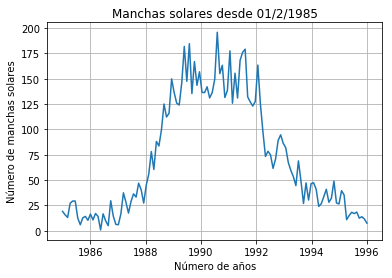

In [5]:
with open('../../Ejercicios/monthrg.dat', 'r') as fp:
    lines = fp.readlines()

b_year = 1985
b_month = 2
    
mat = np.array([[float(x) for x in line.split(' ') if len(x) > 0] for line in lines])

mask = (mat[:, 0] >= b_year) & (mat[:, 1] >= b_month)
values = mat[mask, :]

n_years = np.sum(values[:, 1] == 2)
years = np.linspace(0, n_years, values.shape[0]) + b_year

plt.plot(years, values[:, 3])
plt.title('Manchas solares desde 01/{0}/{1}'.format(b_month, b_year))
plt.xlabel(u'Número de años')
plt.ylabel(u'Número de manchas solares')
plt.grid()